## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [2]:
#Tensorflow 설치하기
%pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=20d24b8f1393fb6867e813b7ec6423d1c94ffcbad60d895710cfff825433d2c4
  Stored in directory: c:\users\wslee\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


* 데이터 프레임 관련 라이브러리

In [91]:
#라이브러리 불러오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

### **나.  학습데이터 불러오기**

In [1]:
data = pd.read_csv('train_dataset.csv', delimiter=',')

In [2]:
test_data = pd.read_csv('test_dataset_v01.csv', delimiter=',')

### **다.  데이터 전처리**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             1975 non-null   float64
 4   url_domain_len           1975 non-null   float64
 5   url_hostname_len         1978 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_ip_present           2441 non-null   int64  
 11  url_entropy              2441 non-null   float64
 12  url_chinese_present      2441 non-null   int64  
 13  url_port                 2441 non-null   int64  
 14  html_num_tags('iframe') 

In [5]:
feature = 'url_domain_len'

In [6]:
test_data[feature].isnull().sum()

466

In [7]:
test_data.loc[test_data[feature].isnull(), 'url_domain_len'] = test_data.loc[test_data[feature].isnull(), 'url_hostname_len']

In [8]:
test_data[feature].isnull().sum()

101

In [9]:
test_data.loc[test_data[feature].isnull(), 'url_domain_len'] = test_data.loc[test_data[feature].isnull(), 'url_len'] - test_data.loc[test_data[feature].isnull(), 'url_path_len']

In [10]:
test_data[feature].isnull().sum()

15

In [11]:
feature = 'url_path_len'

In [12]:
test_data[feature].isnull().sum()

466

In [13]:
test_data.loc[test_data[feature].isnull(), 'url_path_len'] = test_data.loc[test_data[feature].isnull(), 'url_len'] - test_data.loc[test_data[feature].isnull(), 'url_domain_len']

In [14]:
test_data[feature].isnull().sum()

15

In [15]:
tmp = list(test_data.loc[test_data[feature].isnull(), 'Unnamed: 0'])
tmp

[21,
 74,
 127,
 154,
 452,
 826,
 1005,
 1145,
 1284,
 1303,
 1561,
 1602,
 1776,
 1948,
 1957]

In [16]:
tmp_data = test_data.groupby(by='url_len')['url_path_len', 'url_domain_len'].mean()
tmp_data

C:\Users\Wslee\AppData\Local\Temp/ipykernel_33880/620597061.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp_data = test_data.groupby(by='url_len')['url_path_len', 'url_domain_len'].mean()


,url_path_len,url_domain_len
url_len,,
5,0.000000,5.000000
9,0.000000,9.000000
10,0.333333,9.666667
11,0.000000,11.000000
12,0.100000,11.900000
...,...,...
1186,44.000000,53.000000
1250,1227.000000,23.000000
1276,1255.000000,21.000000


In [17]:
for i in tmp:
    test_data.loc[i , 'url_path_len'] = tmp_data.loc[test_data.loc[i, 'url_len']]['url_path_len']
    test_data.loc[i , 'url_domain_len'] = tmp_data.loc[test_data.loc[i, 'url_len']]['url_domain_len']

In [18]:
test_data[feature].isnull().sum()

0

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             2441 non-null   float64
 4   url_domain_len           2441 non-null   float64
 5   url_hostname_len         1978 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_ip_present           2441 non-null   int64  
 11  url_entropy              2441 non-null   float64
 12  url_chinese_present      2441 non-null   int64  
 13  url_port                 2441 non-null   int64  
 14  html_num_tags('iframe') 

In [101]:
feature = 'html_num_tags(\'script\')'

In [29]:
test_data[feature].isnull().sum()

467

In [30]:
test_data.loc[test_data[feature].isnull(), :]

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
1,1,37,0,22.0,15.0,15.0,3,1,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
3,3,40,0,14.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,4,43,2,17.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0
5,5,29,1,1.0,28.0,28.0,3,0,0,0,...,0,NaN,0,0,41,1,1,1.0,18.0,0
8,8,175,0,62.0,14.0,NaN,3,0,98,2,...,0,NaN,0,0,0,1,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,2401,28,0,11.0,17.0,17.0,2,0,0,0,...,0,NaN,0,0,1,1,1,0.0,NaN,0
2421,2421,38,0,21.0,17.0,17.0,2,0,0,0,...,0,NaN,0,0,1,1,1,0.0,0.0,0
2424,2424,16,0,0.0,16.0,13.0,3,0,0,0,...,0,NaN,0,0,1,1,1,NaN,1.0,0
2427,2427,17,0,0.0,17.0,17.0,2,0,0,0,...,1,NaN,0,0,249,1,1,3.0,NaN,0


In [103]:
test_data[feature].mean()

7.469889389594429

In [102]:
test_data[feature].mode()[0]

2.0

In [34]:
test_data.loc[test_data[feature].isnull(), feature] = test_data[feature].mode()[0]

In [36]:
test_data[feature].isnull().sum()

0

In [37]:
feature = 'html_num_tags(\'form\')'

In [38]:
test_data[feature].isnull().sum()

467

In [99]:
test_data[feature].mean()

54.32199918066366

In [100]:
test_data[feature].mode()[0]

0.0

In [41]:
test_data.loc[test_data[feature].isnull(), feature] = test_data[feature].mode()[0]

In [42]:
test_data[feature].isnull().sum()

0

In [104]:
feature = 'html_num_tags(\'a\')'

In [105]:
test_data[feature].isnull().sum()

0

In [106]:
test_data[feature].mean()

54.32199918066366

In [107]:
test_data[feature].mode()

0    0.0
dtype: float64

In [49]:
test_data.loc[test_data[feature].isnull(), feature] = test_data[feature].mode()[0]

In [50]:
test_data[feature].isnull().sum()

0

In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             2441 non-null   float64
 4   url_domain_len           2441 non-null   float64
 5   url_hostname_len         1978 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_ip_present           2441 non-null   int64  
 11  url_entropy              2441 non-null   float64
 12  url_chinese_present      2441 non-null   int64  
 13  url_port                 2441 non-null   int64  
 14  html_num_tags('iframe') 

In [52]:
data.loc[data['url_path_len'].isnull(), 'url_path_len'] = data.loc[data['url_path_len'].isnull(), 'url_len'] - data.loc[data['url_path_len'].isnull(), 'url_domain_len']
data.loc[data['url_domain_len'].isnull(), 'url_domain_len'] = data.loc[data['url_domain_len'].isnull(), 'url_len'] - data.loc[data['url_domain_len'].isnull(), 'url_path_len']

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3664 non-null   float64
 4   url_domain_len           3664 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [54]:
columns = ['url_num_hyphens_dom', 'url_num_underscores', 'url_domain_len', 'url_path_len', 'url_num_dots', 'url_ip_present', 'html_num_tags(\'iframe\')', 'html_num_tags(\'script\')', 'html_num_tags(\'embed\')', 'html_num_tags(\'object\')', 'html_num_tags(\'div\')', 'html_num_tags(\'form\')', 'html_num_tags(\'a\')']
data = data.drop_duplicates(columns, keep = 'first')

In [55]:
data['Result_v1'].unique()

array(['malicious', 'benign'], dtype=object)

In [56]:
data['Result_v1'] = data['Result_v1'].replace({'malicious' : -1, 'benign' : 1})
data['Result_v1'].unique()

array([-1,  1], dtype=int64)

In [57]:
data.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1


In [58]:
columns = ['Unnamed: 0', 'url_len', 'url_hostname_len', 'url_chinese_present', 'html_num_tags(\'applet\')']
data = data.drop(columns=columns, axis=1)

In [59]:
test_data = test_data.drop(columns=columns, axis=1)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2634 entries, 0 to 3663
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_num_hyphens_dom      2634 non-null   float64
 1   url_path_len             2634 non-null   float64
 2   url_domain_len           2634 non-null   float64
 3   url_num_dots             2634 non-null   float64
 4   url_num_underscores      2634 non-null   float64
 5   url_query_len            2634 non-null   float64
 6   url_num_query_para       2634 non-null   float64
 7   url_ip_present           2634 non-null   float64
 8   url_entropy              2634 non-null   float64
 9   url_port                 2634 non-null   float64
 10  html_num_tags('iframe')  2634 non-null   float64
 11  html_num_tags('script')  2634 non-null   float64
 12  html_num_tags('embed')   2634 non-null   float64
 13  html_num_tags('object')  2634 non-null   float64
 14  html_num_tags('div')    

In [61]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_num_hyphens_dom      2441 non-null   int64  
 1   url_path_len             2441 non-null   float64
 2   url_domain_len           2441 non-null   float64
 3   url_num_dots             2441 non-null   int64  
 4   url_num_underscores      2441 non-null   int64  
 5   url_query_len            2441 non-null   int64  
 6   url_num_query_para       2441 non-null   int64  
 7   url_ip_present           2441 non-null   int64  
 8   url_entropy              2441 non-null   float64
 9   url_port                 2441 non-null   int64  
 10  html_num_tags('iframe')  2441 non-null   int64  
 11  html_num_tags('script')  2441 non-null   float64
 12  html_num_tags('embed')   2441 non-null   int64  
 13  html_num_tags('object')  2441 non-null   int64  
 14  html_num_tags('div')    

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [62]:
from sklearn.model_selection import train_test_split

In [63]:
target = 'Result_v1'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [64]:
# train_test_split 사용
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 2022)

In [65]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = .3, random_state = 2022)

In [68]:
scaler = MinMaxScaler()

In [69]:
x_s = scaler.fit_transform(x)

In [70]:
test_data_s = scaler.transform(test_data)

In [71]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_s, y, test_size = .3, random_state = 2022)

In [72]:
x_train_s, x_val_s, y_train_s, y_val_s = train_test_split(x_train_s, y_train_s, test_size = .3, random_state = 2022)

### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [85]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [86]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

In [87]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


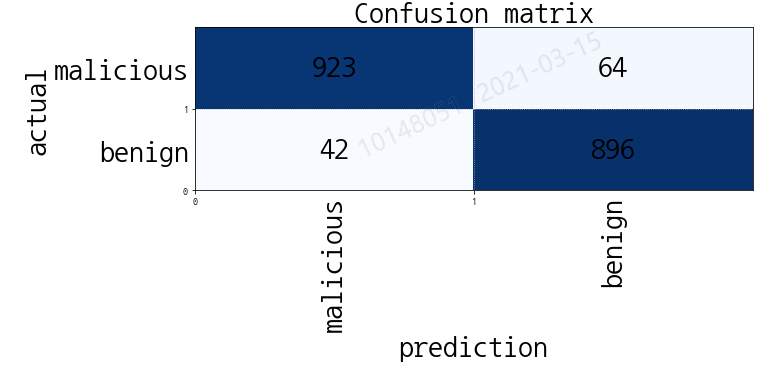

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

In [67]:
# 1. import
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import * 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### 1. LogisticRegression

In [112]:
# 2.선언 
LR_model = LogisticRegression()

In [113]:
# 3. fit(), 학습
LR_model.fit(x_train, y_train)

LogisticRegression()

In [114]:
# 4. predict(), 예측
LR_pred = LR_model.predict(x_val)

In [115]:
confusion_matrix( y_val , LR_pred  )

array([[222,  48],
       [ 50, 233]], dtype=int64)

In [116]:
# train 및 val 데이터 정확도 확인 
print(classification_report(y_val , LR_pred  ))

              precision    recall  f1-score   support

          -1       0.82      0.82      0.82       270
           1       0.83      0.82      0.83       283

    accuracy                           0.82       553
   macro avg       0.82      0.82      0.82       553
weighted avg       0.82      0.82      0.82       553



In [117]:
LR_pred = LR_model.predict(x_test)

In [118]:
confusion_matrix(y_test, LR_pred )

array([[316,  72],
       [ 53, 350]], dtype=int64)

In [119]:
print(classification_report(y_test , LR_pred  ))

              precision    recall  f1-score   support

          -1       0.86      0.81      0.83       388
           1       0.83      0.87      0.85       403

    accuracy                           0.84       791
   macro avg       0.84      0.84      0.84       791
weighted avg       0.84      0.84      0.84       791



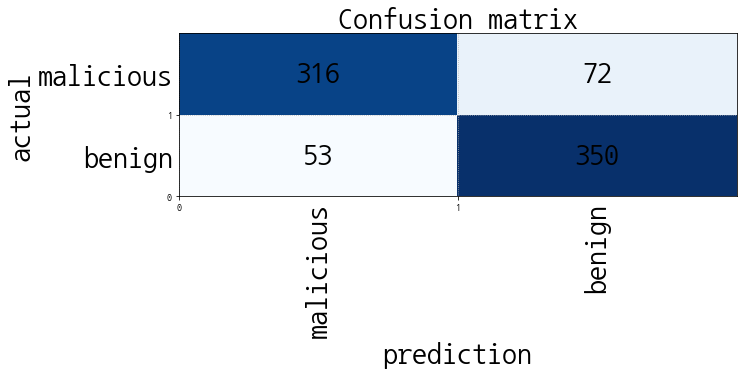

In [120]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, LR_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [121]:
answer = LR_model.predict(test_data)

In [123]:
answer

array([ 1,  1,  1, ..., -1, -1,  1], dtype=int64)

In [124]:
tmp = pd.DataFrame()

In [126]:
tmp['expected'] = answer

In [127]:
tmp

,expected
0,1
1,1
2,1
3,-1
4,-1
...,...
2436,1
2437,1
2438,-1
2439,-1


In [128]:
tmp.index.names = ['id']

In [129]:
tmp

,expected
id,
0,1
1,1
2,1
3,-1
4,-1
...,...
2436,1
2437,1
2438,-1


In [134]:
tmp.to_csv("submission.csv", mode='w')

In [135]:
# 아래 함수는 로지스틱 회귀를 위한 전진선택법 함수 입니다.
import statsmodels.api as sm

def forward_stepwise_logistic(x_train, y_train):

    # 변수목록, 선택된 변수 목록, 단계별 모델과 AIC 저장소 정의
    features = list(x_train)
    selected = []
    step_df = pd.DataFrame({ 'step':[], 'feature':[],'aic':[]})

    # 
    for s in range(0, len(features)) :
        result =  { 'step':[], 'feature':[],'aic':[]}

        # 변수 목록에서 변수 한개씩 뽑아서 모델에 추가
        for f in features :
            vars = selected + [f]
            x_tr = x_train[vars]
            model = sm.Logit(y_train, x_tr).fit(maxiter=19, disp=False)
            result['step'].append(s+1)
            result['feature'].append(vars)
            result['aic'].append(model.aic)
        
        # 모델별 aic 집계
        temp = pd.DataFrame(result).sort_values('aic').reset_index(drop = True)

        # 만약 이전 aic보다 새로운 aic 가 크다면 멈추기
        if step_df['aic'].min() < temp['aic'].min() :
            break
        step_df = pd.concat([step_df, temp], axis = 0).reset_index(drop = True)

        # 선택된 변수 제거
        v = temp.loc[0,'feature'][s]
        features.remove(v)

        selected.append(v)
    
    # 선택된 변수와 step_df 결과 반환
    return selected, step_df

In [136]:
LR_y_train = xgb_y_train.astype(int)

In [137]:
vars, result = forward_stepwise_logistic(x_train, LR_y_train)

In [138]:
vars

['url_num_hyphens_dom',
 "html_num_tags('a')",
 "html_num_tags('form')",
 'url_path_len',
 'url_query_len',
 'url_num_underscores',
 "html_num_tags('script')",
 "html_num_tags('iframe')",
 "html_num_tags('object')",
 'url_domain_len',
 'url_entropy',
 'url_num_dots',
 "html_num_tags('body')",
 "html_num_tags('div')"]

In [139]:
result

,step,feature,aic
0,1.0,[url_num_hyphens_dom],1659.552018
1,1.0,[html_num_tags('a')],1678.366782
2,1.0,[url_query_len],1718.232438
3,1.0,[url_num_query_para],1730.709069
4,1.0,[html_num_tags('script')],1747.119582
...,...,...,...
170,14.0,"[url_num_hyphens_dom, html_num_tags('a'), html...",1032.197209
171,14.0,"[url_num_hyphens_dom, html_num_tags('a'), html...",1032.491131
172,14.0,"[url_num_hyphens_dom, html_num_tags('a'), html...",1032.783095
173,14.0,"[url_num_hyphens_dom, html_num_tags('a'), html...",1032.796352


In [140]:
LR_model2 = LogisticRegression()
LR_model2.fit(x_train[vars], y_train)
LR_pred2 = LR_model2.predict(x_val[vars])

print(accuracy_score(y_val, LR_pred2))
print(classification_report(y_val, LR_pred2))

0.8209764918625678
              precision    recall  f1-score   support

          -1       0.81      0.82      0.82       270
           1       0.83      0.82      0.82       283

    accuracy                           0.82       553
   macro avg       0.82      0.82      0.82       553
weighted avg       0.82      0.82      0.82       553



In [141]:
confusion_matrix(y_val, LR_pred2 )

array([[222,  48],
       [ 51, 232]], dtype=int64)

In [142]:
LR_pred2 = LR_model2.predict(x_test[vars])

In [143]:
confusion_matrix(y_test, LR_pred2 )

array([[317,  71],
       [ 53, 350]], dtype=int64)

In [144]:
print(classification_report(y_test, LR_pred2))

              precision    recall  f1-score   support

          -1       0.86      0.82      0.84       388
           1       0.83      0.87      0.85       403

    accuracy                           0.84       791
   macro avg       0.84      0.84      0.84       791
weighted avg       0.84      0.84      0.84       791



In [164]:
# Feature(특징)별 가중치 확인
answer = LR_model2.predict(test_data[vars])

In [165]:
tmp = pd.DataFrame()
tmp['expected'] = answer
tmp.index.names = ['id']
tmp

,expected
id,
0,1
1,1
2,1
3,-1
4,-1
...,...
2436,1
2437,1
2438,-1


In [166]:
tmp.to_csv("submission2.csv", mode='w')

### 2. KNeighborsClassifier

In [153]:
KNN_model = KNeighborsClassifier()

In [154]:
KNN_model.fit(x_train_s, y_train_s)

KNeighborsClassifier()

In [155]:
KNN_pred = KNN_model.predict(x_val_s)

In [156]:
confusion_matrix( y_val_s , KNN_pred  )

array([[208,  62],
       [ 50, 233]], dtype=int64)

In [157]:
print(classification_report(y_val_s , KNN_pred  ))

              precision    recall  f1-score   support

          -1       0.81      0.77      0.79       270
           1       0.79      0.82      0.81       283

    accuracy                           0.80       553
   macro avg       0.80      0.80      0.80       553
weighted avg       0.80      0.80      0.80       553



In [158]:
KNN_pred = KNN_model.predict(x_test_s)

In [159]:
confusion_matrix(y_test_s, KNN_pred )

array([[309,  79],
       [ 70, 333]], dtype=int64)

In [160]:
print(classification_report(y_test , KNN_pred  ))

              precision    recall  f1-score   support

          -1       0.82      0.80      0.81       388
           1       0.81      0.83      0.82       403

    accuracy                           0.81       791
   macro avg       0.81      0.81      0.81       791
weighted avg       0.81      0.81      0.81       791



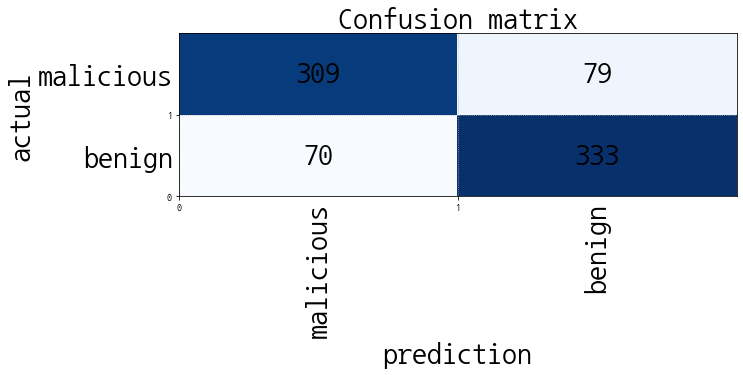

In [170]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, KNN_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [167]:
answer = KNN_model.predict(test_data)
tmp = pd.DataFrame()
tmp['expected'] = answer
tmp.index.names = ['id']
tmp
tmp.to_csv("submission3.csv", mode='w')

In [171]:
KNN_model2 = KNeighborsClassifier()

In [172]:
x_train_s.shape

(1290, 19)

In [173]:
import math
math.sqrt(1290)

35.91656999213594

In [174]:
KNN_params = {'n_neighbors' : range(25, 45, 1), 'metric' : ['minkowski', 'euclidean', 'manhattan'] }

In [175]:
KNN_model_gs = GridSearchCV(KNN_model2, KNN_params, cv=5, verbose=3)

In [176]:
KNN_model_gs.fit(x_train_s, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ..metric=minkowski, n_neighbors=25;, score=0.795 total time=   0.0s
[CV 2/5] END ..metric=minkowski, n_neighbors=25;, score=0.756 total time=   0.0s
[CV 3/5] END ..metric=minkowski, n_neighbors=25;, score=0.822 total time=   0.0s
[CV 4/5] END ..metric=minkowski, n_neighbors=25;, score=0.818 total time=   0.0s
[CV 5/5] END ..metric=minkowski, n_neighbors=25;, score=0.795 total time=   0.0s
[CV 1/5] END ..metric=minkowski, n_neighbors=26;, score=0.798 total time=   0.0s
[CV 2/5] END ..metric=minkowski, n_neighbors=26;, score=0.756 total time=   0.0s
[CV 3/5] END ..metric=minkowski, n_neighbors=26;, score=0.818 total time=   0.0s
[CV 4/5] END ..metric=minkowski, n_neighbors=26;, score=0.814 total time=   0.0s
[CV 5/5] END ..metric=minkowski, n_neighbors=26;, score=0.798 total time=   0.0s
[CV 1/5] END ..metric=minkowski, n_neighbors=27;, score=0.791 total time=   0.0s
[CV 2/5] END ..metric=minkowski, n_neighbors=27

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(25, 45)},
             verbose=3)

In [177]:
KNN_model_gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 28}

In [178]:
KNN_model_gs.best_score_

0.813953488372093

In [179]:
KNN_pred2 = KNN_model_gs.predict(x_val_s)
print(classification_report(y_val, KNN_pred2))

              precision    recall  f1-score   support

          -1       0.89      0.75      0.81       270
           1       0.79      0.91      0.85       283

    accuracy                           0.83       553
   macro avg       0.84      0.83      0.83       553
weighted avg       0.84      0.83      0.83       553



In [180]:
KNN_pred2 = KNN_model_gs.predict(x_test_s)
print(classification_report(y_test, KNN_pred2))

              precision    recall  f1-score   support

          -1       0.85      0.74      0.79       388
           1       0.78      0.87      0.82       403

    accuracy                           0.81       791
   macro avg       0.81      0.81      0.81       791
weighted avg       0.81      0.81      0.81       791



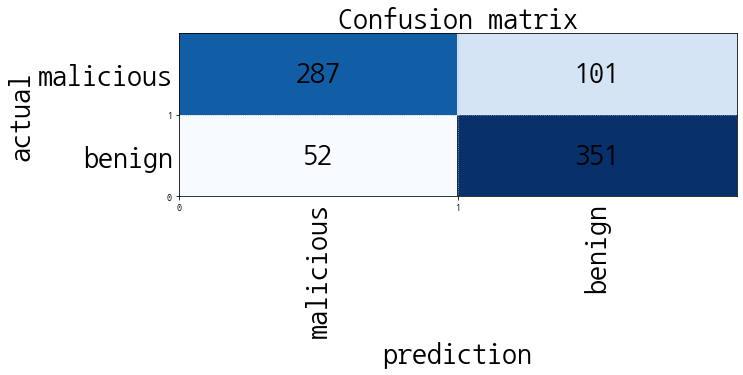

In [181]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, KNN_pred2)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

### 3. DecisionTreeClassifier

In [182]:
DT_model = DecisionTreeClassifier()

In [194]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [184]:
DT_pred = DT_model.predict(x_val)

In [185]:
confusion_matrix( y_val , DT_pred  )

array([[242,  28],
       [ 26, 257]], dtype=int64)

In [186]:
print(classification_report(y_val , DT_pred  ))

              precision    recall  f1-score   support

          -1       0.90      0.90      0.90       270
           1       0.90      0.91      0.90       283

    accuracy                           0.90       553
   macro avg       0.90      0.90      0.90       553
weighted avg       0.90      0.90      0.90       553



In [187]:
DT_pred = DT_model.predict(x_test)

In [188]:
confusion_matrix(y_test, DT_pred )

array([[353,  35],
       [ 40, 363]], dtype=int64)

In [189]:
print(classification_report(y_test , DT_pred  ))

              precision    recall  f1-score   support

          -1       0.90      0.91      0.90       388
           1       0.91      0.90      0.91       403

    accuracy                           0.91       791
   macro avg       0.91      0.91      0.91       791
weighted avg       0.91      0.91      0.91       791



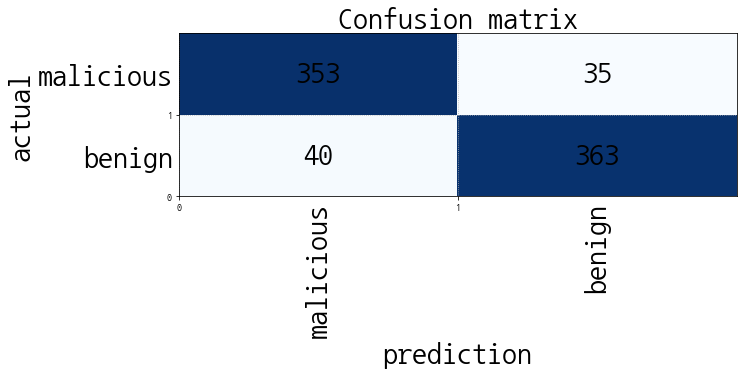

In [190]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, DT_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [193]:
answer = DT_model.predict(test_data)
tmp = pd.DataFrame()
tmp['expected'] = answer
tmp.index.names = ['id']
tmp
tmp.to_csv("submission5.csv", mode='w')

In [195]:
DT_model2 = DecisionTreeClassifier()

In [196]:
DT_params = {'max_depth' : range(1, 11), 'min_samples_leaf' : range(10, 101)}

In [197]:
DT_model_gs = GridSearchCV(DT_model2, DT_params, cv=5)

In [198]:
DT_model_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(10, 101)})

In [199]:
DT_model_gs.best_params_

{'max_depth': 6, 'min_samples_leaf': 11}

In [200]:
DT_model_gs.best_score_

0.8868217054263565

In [201]:
DT_model_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(10, 101)})

In [202]:
DT_pred2 = DT_model_gs.predict(x_val)

In [203]:
confusion_matrix(y_val, DT_pred2 )

array([[239,  31],
       [ 25, 258]], dtype=int64)

In [204]:
print(classification_report(y_val , DT_pred2  ))

              precision    recall  f1-score   support

          -1       0.91      0.89      0.90       270
           1       0.89      0.91      0.90       283

    accuracy                           0.90       553
   macro avg       0.90      0.90      0.90       553
weighted avg       0.90      0.90      0.90       553



In [206]:
DT_pred2 = DT_model_gs.predict(x_test)

In [207]:
confusion_matrix(y_test, DT_pred2 )

array([[336,  52],
       [ 48, 355]], dtype=int64)

In [208]:
print(classification_report(y_test , DT_pred2  ))

              precision    recall  f1-score   support

          -1       0.88      0.87      0.87       388
           1       0.87      0.88      0.88       403

    accuracy                           0.87       791
   macro avg       0.87      0.87      0.87       791
weighted avg       0.87      0.87      0.87       791



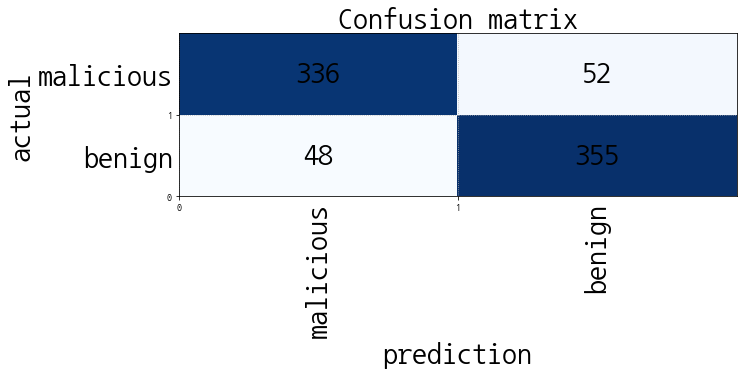

In [209]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, DT_pred2)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

### 4. SVC

In [210]:
SVC_model = SVC()

In [211]:
SVC_model.fit(x_train_s, y_train_s)

SVC()

In [212]:
SVC_pred = SVC_model.predict(x_val_s)

In [213]:
confusion_matrix( y_val_s , SVC_pred  )

array([[184,  86],
       [ 34, 249]], dtype=int64)

In [214]:
print(classification_report(y_val_s , SVC_pred  ))

              precision    recall  f1-score   support

          -1       0.84      0.68      0.75       270
           1       0.74      0.88      0.81       283

    accuracy                           0.78       553
   macro avg       0.79      0.78      0.78       553
weighted avg       0.79      0.78      0.78       553



In [215]:
SVC_pred = SVC_model.predict(x_test_s)

In [216]:
confusion_matrix( y_test_s , SVC_pred  )

array([[277, 111],
       [ 48, 355]], dtype=int64)

In [217]:
print(classification_report(y_test_s , SVC_pred  ))

              precision    recall  f1-score   support

          -1       0.85      0.71      0.78       388
           1       0.76      0.88      0.82       403

    accuracy                           0.80       791
   macro avg       0.81      0.80      0.80       791
weighted avg       0.81      0.80      0.80       791



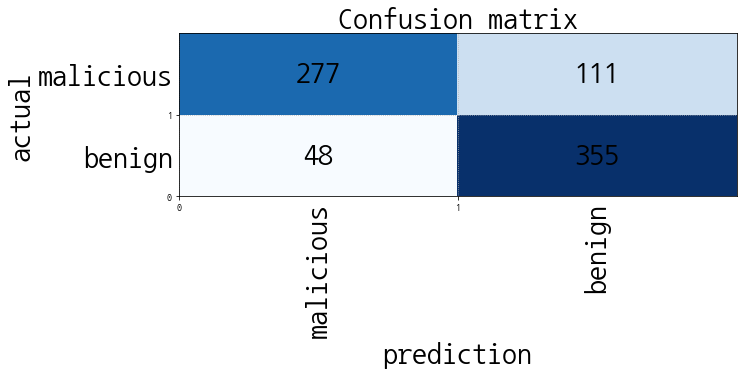

In [218]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test_s, SVC_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [219]:
SVC_model2 = SVC()

In [220]:
SVC_params = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [221]:
SVC_model_gs = GridSearchCV(SVC_model2, SVC_params, cv=5)

In [222]:
SVC_model_gs.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]})

In [223]:
SVC_model_gs.best_params_

{'C': 1000, 'gamma': 1}

In [224]:
SVC_model_gs.best_score_

0.8612403100775194

In [225]:
SVC_params = {'C' : range(100, 2001, 100), 'gamma' : np.linspace(0.5, 1.5, 10)}

In [226]:
SVC_model_gs = GridSearchCV(SVC_model2, SVC_params, cv=5)

In [227]:
SVC_model_gs.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': range(100, 2001, 100),
                         'gamma': array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])})

In [228]:
SVC_model_gs.best_params_

{'C': 600, 'gamma': 1.5}

In [229]:
SVC_model_gs.best_score_

0.8658914728682172

In [230]:
SVC_params = {'C' : range(500, 701, 20), 'gamma' : range(1, 11)}

In [231]:
SVC_model_gs = GridSearchCV(SVC_model2, SVC_params, cv=5)

In [232]:
SVC_model_gs.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': range(500, 701, 20), 'gamma': range(1, 11)})

In [233]:
SVC_model_gs.best_params_

{'C': 540, 'gamma': 6}

In [234]:
SVC_model_gs.best_score_

0.875968992248062

In [235]:
SVC_params = {'C' : range(500, 580, 10), 'gamma' : np.linspace(5, 7, 21)}

In [236]:
SVC_model_gs = GridSearchCV(SVC_model2, SVC_params, cv=5)

In [237]:
SVC_model_gs.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': range(500, 580, 10),
                         'gamma': array([5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2,
       6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])})

In [238]:
SVC_model_gs.best_params_

{'C': 570, 'gamma': 5.2}

In [239]:
SVC_model_gs.best_score_

0.8767441860465116

In [240]:
SVC_params = {'C' : range(565, 576), 'gamma' : np.linspace(5.15, 5.25, 11)}

In [241]:
SVC_model_gs = GridSearchCV(SVC_model2, SVC_params, cv=5)

In [242]:
SVC_model_gs.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': range(565, 576),
                         'gamma': array([5.15, 5.16, 5.17, 5.18, 5.19, 5.2 , 5.21, 5.22, 5.23, 5.24, 5.25])})

In [243]:
SVC_model_gs.best_params_

{'C': 565, 'gamma': 5.21}

In [244]:
SVC_model_gs.best_score_

0.8767441860465116

In [245]:
SVC_model_gs.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': range(565, 576),
                         'gamma': array([5.15, 5.16, 5.17, 5.18, 5.19, 5.2 , 5.21, 5.22, 5.23, 5.24, 5.25])})

In [246]:
SVC_pred2 = SVC_model_gs.predict(x_val_s)

In [247]:
confusion_matrix( y_val_s , SVC_pred2  )

array([[227,  43],
       [ 40, 243]], dtype=int64)

In [248]:
print(classification_report(y_val_s , SVC_pred2  ))

              precision    recall  f1-score   support

          -1       0.85      0.84      0.85       270
           1       0.85      0.86      0.85       283

    accuracy                           0.85       553
   macro avg       0.85      0.85      0.85       553
weighted avg       0.85      0.85      0.85       553



In [249]:
SVC_pred2 = SVC_model_gs.predict(x_test_s)

In [250]:
confusion_matrix( y_test_s , SVC_pred2  )

array([[330,  58],
       [ 42, 361]], dtype=int64)

In [251]:
print(classification_report(y_test_s , SVC_pred2  ))

              precision    recall  f1-score   support

          -1       0.89      0.85      0.87       388
           1       0.86      0.90      0.88       403

    accuracy                           0.87       791
   macro avg       0.87      0.87      0.87       791
weighted avg       0.87      0.87      0.87       791



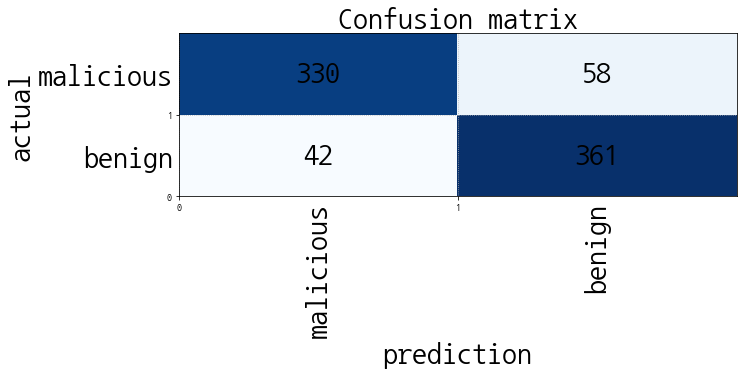

In [252]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test_s, SVC_pred2)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

### 5. RandomForestClassifier

In [73]:
RF_model = RandomForestClassifier()

In [74]:
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [255]:
RF_pred = RF_model.predict(x_val)

In [256]:
confusion_matrix( y_val, RF_pred  )

array([[255,  15],
       [ 13, 270]], dtype=int64)

In [257]:
print(classification_report(y_val , RF_pred  ))

              precision    recall  f1-score   support

          -1       0.95      0.94      0.95       270
           1       0.95      0.95      0.95       283

    accuracy                           0.95       553
   macro avg       0.95      0.95      0.95       553
weighted avg       0.95      0.95      0.95       553



In [258]:
RF_pred = RF_model.predict(x_test)

In [259]:
confusion_matrix( y_test, RF_pred  )

array([[359,  29],
       [ 24, 379]], dtype=int64)

In [260]:
print(classification_report(y_test , RF_pred  ))

              precision    recall  f1-score   support

          -1       0.94      0.93      0.93       388
           1       0.93      0.94      0.93       403

    accuracy                           0.93       791
   macro avg       0.93      0.93      0.93       791
weighted avg       0.93      0.93      0.93       791



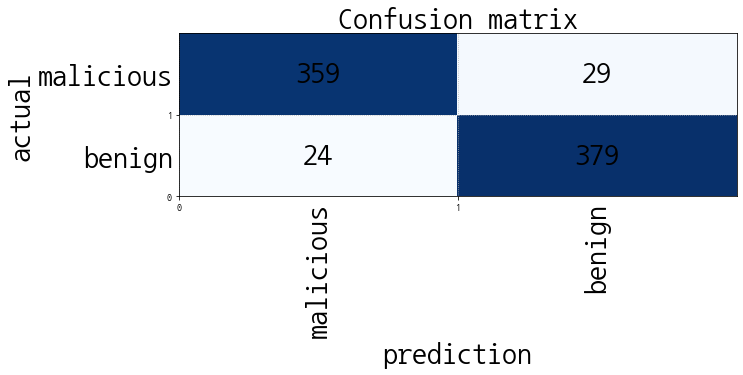

In [261]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_test, RF_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [262]:
answer = RF_model.predict(test_data)
tmp = pd.DataFrame()
tmp['expected'] = answer
tmp.index.names = ['id']
tmp
tmp.to_csv("submission6.csv", mode='w')

In [77]:
RF_model2 = RandomForestClassifier()

In [78]:
RF_params = {'n_estimators': range(5, 201, 10), 'max_features': range(1, 11)}

In [79]:
RF_mode_gs = GridSearchCV(RF_model2, RF_params, cv=5)

In [314]:
RF_mode_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 11),
                         'n_estimators': range(5, 201, 20)})

In [315]:
RF_mode_gs.best_params_

{'max_features': 1, 'n_estimators': 145}

In [316]:
RF_mode_gs.best_score_

0.9465116279069768

In [317]:
answer = RF_mode_gs.predict(test_data)
tmp = pd.DataFrame()
tmp['expected'] = answer
tmp.index.names = ['id']
tmp
tmp.to_csv("submission10.csv", mode='w')

In [80]:
RF_mode_gs.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 11),
                         'n_estimators': range(5, 201, 10)})

In [81]:
RF_mode_gs.best_params_

{'max_features': 5, 'n_estimators': 185}

In [82]:
RF_mode_gs.best_score_

0.948749287523178

In [83]:
answer = RF_mode_gs.predict(test_data)
tmp = pd.DataFrame()
tmp['expected'] = answer
tmp.index.names = ['id']
tmp
tmp.to_csv("submission14.csv", mode='w')

### 6. XGBClassifier

In [85]:
xgb_y_train = y_train.map({-1 : 0.0, 1 : 1})
xgb_y_val = y_val.map({-1 : 0.0, 1 : 1})
xgb_y_test = y_test.map({-1 : 0.0, 1 : 1})

In [263]:
XGB_model = XGBClassifier()

In [264]:
XGB_model.fit(x_train, xgb_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [265]:
XGB_pred = XGB_model.predict(x_val)

In [266]:
confusion_matrix( xgb_y_val, XGB_pred  )

array([[250,  20],
       [ 14, 269]], dtype=int64)

In [267]:
print(classification_report(xgb_y_val , XGB_pred  ))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       270
         1.0       0.93      0.95      0.94       283

    accuracy                           0.94       553
   macro avg       0.94      0.94      0.94       553
weighted avg       0.94      0.94      0.94       553



In [268]:
XGB_pred = XGB_model.predict(x_test)

In [269]:
confusion_matrix( xgb_y_test, XGB_pred  )

array([[361,  27],
       [ 24, 379]], dtype=int64)

In [270]:
print(classification_report(xgb_y_test , XGB_pred  ))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       388
         1.0       0.93      0.94      0.94       403

    accuracy                           0.94       791
   macro avg       0.94      0.94      0.94       791
weighted avg       0.94      0.94      0.94       791



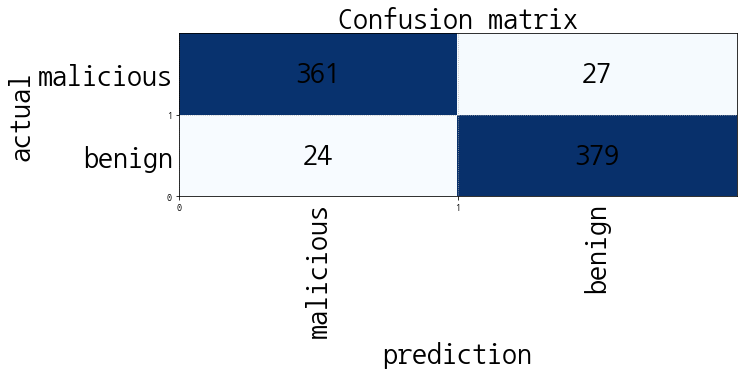

In [271]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(xgb_y_test, XGB_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [300]:
answer = XGB_model.predict(test_data)
tmp = pd.DataFrame()
tmp['expected'] = answer
tmp.index.names = ['id']
tmp = tmp.replace({0 : -1})
tmp

,expected
id,
0,1
1,1
2,1
3,-1
4,1
...,...
2436,1
2437,-1
2438,-1


In [ ]:
tmp.to_csv("submission7.csv", mode='w')

In [86]:
xgb_y = y.map({-1 : 0.0, 1 : 1})

In [304]:
XGB_model.fit(x, xgb_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [305]:
answer = XGB_model.predict(test_data)
tmp = pd.DataFrame()
tmp['expected'] = answer
tmp.index.names = ['id']
tmp = tmp.replace({0 : -1})
tmp

,expected
id,
0,1
1,1
2,1
3,-1
4,1
...,...
2436,1
2437,-1
2438,1


In [306]:
tmp.to_csv("submission9.csv", mode='w')

In [323]:
XGB_model2 = XGBClassifier()

In [339]:
XGB_params = {'max_depth' : range(3, 9), 'learning_rate':np.linspace(0.001,0.3,30), 'n_estimators': range(100, 201, 10)}

In [340]:
XGB_model_gs = GridSearchCV(XGB_model2, XGB_params, cv = 5)

In [341]:
XGB_model_gs.fit(x_train, xgb_y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
             param_grid={'learning_rate': array([0.001     , 0.01131034, 0.02162069, 0.03193103, 0.04224138,
       0.05255172, 0.06286207, 0.07317241, 0.08348276, 0.0937931 ,
       0.10410345, 0.11441379, 0.12472414, 0.13503448, 0.14534483,
   

In [336]:
XGB_model_gs.best_params_

{'learning_rate': 0.15565517241379312, 'max_depth': 7, 'n_estimators': 100}

In [338]:
XGB_model_gs.best_score_

0.9465116279069768

In [342]:
XGB_model_gs.best_params_

{'learning_rate': 0.20720689655172414, 'max_depth': 6, 'n_estimators': 200}

In [343]:
XGB_model_gs.best_score_

0.9488372093023256

In [344]:
answer = XGB_model_gs.predict(test_data)
tmp = pd.DataFrame()
tmp['expected'] = answer
tmp.index.names = ['id']
tmp = tmp.replace({0 : -1})
tmp

,expected
id,
0,1
1,1
2,1
3,-1
4,1
...,...
2436,1
2437,-1
2438,-1


In [345]:
tmp.to_csv("submission12.csv", mode='w')

In [87]:
XGB_params = {'n_estimators': range(1,200,2)}
model = XGBClassifier()
model_gs = GridSearchCV(model, XGB_params, cv = 5)
model_gs.fit(x, xgb_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [88]:
result = pd.DataFrame(model_gs.cv_results_)

In [89]:
temp = result.loc[:, ['param_n_estimators','mean_test_score']]
temp.head()

,param_n_estimators,mean_test_score
0,1,0.899770
1,3,0.905465
2,5,0.910022
3,7,0.915340
4,9,0.924074


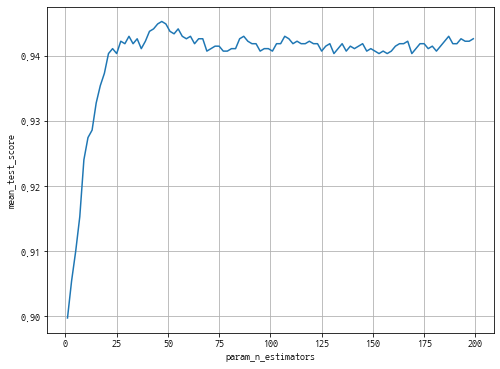

In [92]:
# 이를 차트로 그려봅시다.
plt.figure(figsize = (8,6))
sns.lineplot(x = 'param_n_estimators', y = 'mean_test_score', data = temp )
plt.grid()
plt.show()

In [93]:
XGB_model2 = XGBClassifier()

In [94]:
XGB_params = {'max_depth' : range(3, 9), 'learning_rate':np.linspace(0.001,0.3,30), 'n_estimators': range(25, 76, 10)}

In [95]:
XGB_model_gs = GridSearchCV(XGB_model2, XGB_params, cv = 5)

In [96]:
XGB_model_gs.fit(x, xgb_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
             param_grid={'learning_rate': array([0.001     , 0.01131034, 0.02162069, 0.03193103, 0.04224138,
       0.05255172, 0.06286207, 0.07317241, 0.08348276, 0.0937931 ,
       0.10410345, 0.11441379, 0.12472414, 0.13503448, 0.14534483,
   

In [97]:
XGB_model_gs.best_params_

{'learning_rate': 0.23813793103448277, 'max_depth': 6, 'n_estimators': 35}

In [98]:
XGB_model_gs.best_score_

0.946851032820831

In [283]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline

In [284]:
estimators = [('lr', LogisticRegression()),
              ('dt', DecisionTreeClassifier()),
              ('knn', make_pipeline(MinMaxScaler(), KNeighborsClassifier())),
              ('rf', RandomForestClassifier()),
              ('xgb', XGBClassifier())]

model_stacking = StackingClassifier(estimators=estimators
                                    , final_estimator= RandomForestClassifier())

In [285]:
model_stacking.fit(x_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('knn',
                                Pipeline(steps=[('minmaxscaler',
                                                 MinMaxScaler()),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier())])),
                               ('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_b...
                                              interaction_constraints=None,
                                   

In [286]:
stacking_pred = model_stacking.predict(x_val)

In [287]:
confusion_matrix( y_val, stacking_pred  )

array([[248,  22],
       [ 13, 270]], dtype=int64)

In [288]:
print(classification_report(y_val , stacking_pred  ))

              precision    recall  f1-score   support

          -1       0.95      0.92      0.93       270
           1       0.92      0.95      0.94       283

    accuracy                           0.94       553
   macro avg       0.94      0.94      0.94       553
weighted avg       0.94      0.94      0.94       553



In [289]:
stacking_pred = model_stacking.predict(x_test)

In [290]:
confusion_matrix( y_test, stacking_pred  )

array([[354,  34],
       [ 27, 376]], dtype=int64)

In [291]:
print(classification_report(y_test , stacking_pred  ))

              precision    recall  f1-score   support

          -1       0.93      0.91      0.92       388
           1       0.92      0.93      0.92       403

    accuracy                           0.92       791
   macro avg       0.92      0.92      0.92       791
weighted avg       0.92      0.92      0.92       791



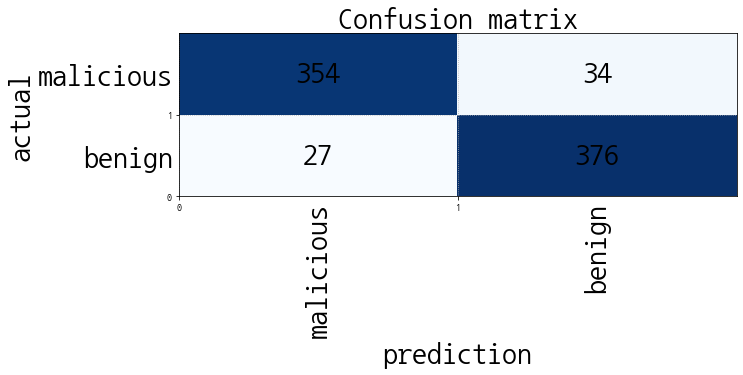

In [292]:
confusion = confusion_matrix(y_test, stacking_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [293]:
answer = model_stacking.predict(test_data)
tmp = pd.DataFrame()
tmp['expected'] = answer
tmp.index.names = ['id']
tmp
tmp.to_csv("submission8.csv", mode='w')